In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from data_prep import apply_mappings, split_features, plot_graphs

from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [4]:
train = split_features(apply_mappings(train))

train.drop(columns = ['id'], inplace = True)

X, y = train.drop(columns = ['Personality']), train['Personality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [5]:
train.isna().sum(axis=1).value_counts()

0    10189
1     7516
2      779
3       38
4        2
Name: count, dtype: int64

In [6]:
train.isna().sum()

Time_spent_Alone                    1190
Stage_fear                          1893
Social_event_attendance             1180
Going_outside                       1466
Drained_after_socializing           1149
Friends_circle_size                 1054
Post_frequency                      1264
Personality                            0
Time_Alone_greater3                    0
Social_event_attendance_greater3       0
Going_outside_greater3                 0
Friends_circle_size_greater5           0
Post_frequency_greater2                0
dtype: int64

In [7]:
train['Personality'].value_counts()

Personality
1    13699
0     4825
Name: count, dtype: int64

In [8]:
train.dtypes

Time_spent_Alone                    float64
Stage_fear                          float64
Social_event_attendance             float64
Going_outside                       float64
Drained_after_socializing           float64
Friends_circle_size                 float64
Post_frequency                      float64
Personality                           int64
Time_Alone_greater3                    bool
Social_event_attendance_greater3       bool
Going_outside_greater3                 bool
Friends_circle_size_greater5           bool
Post_frequency_greater2                bool
dtype: object

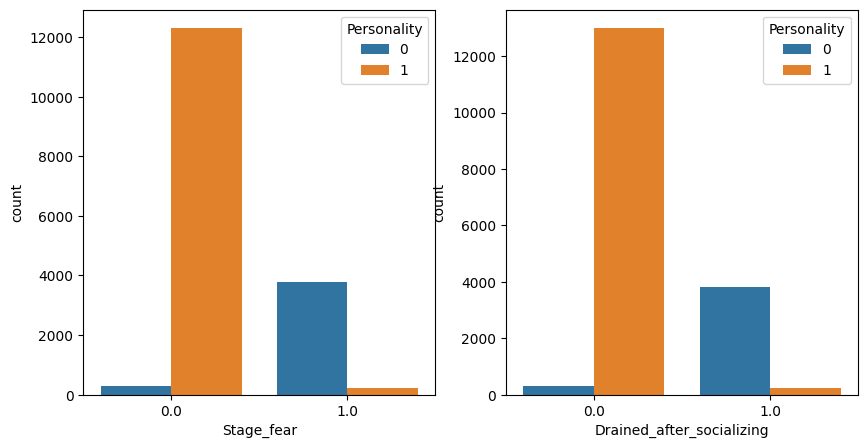

In [9]:
fix, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(x = 'Stage_fear', data = train, hue = 'Personality', ax = ax[0])

sns.countplot(x = 'Drained_after_socializing', data = train, hue = 'Personality', ax = ax[1])

plt.show()

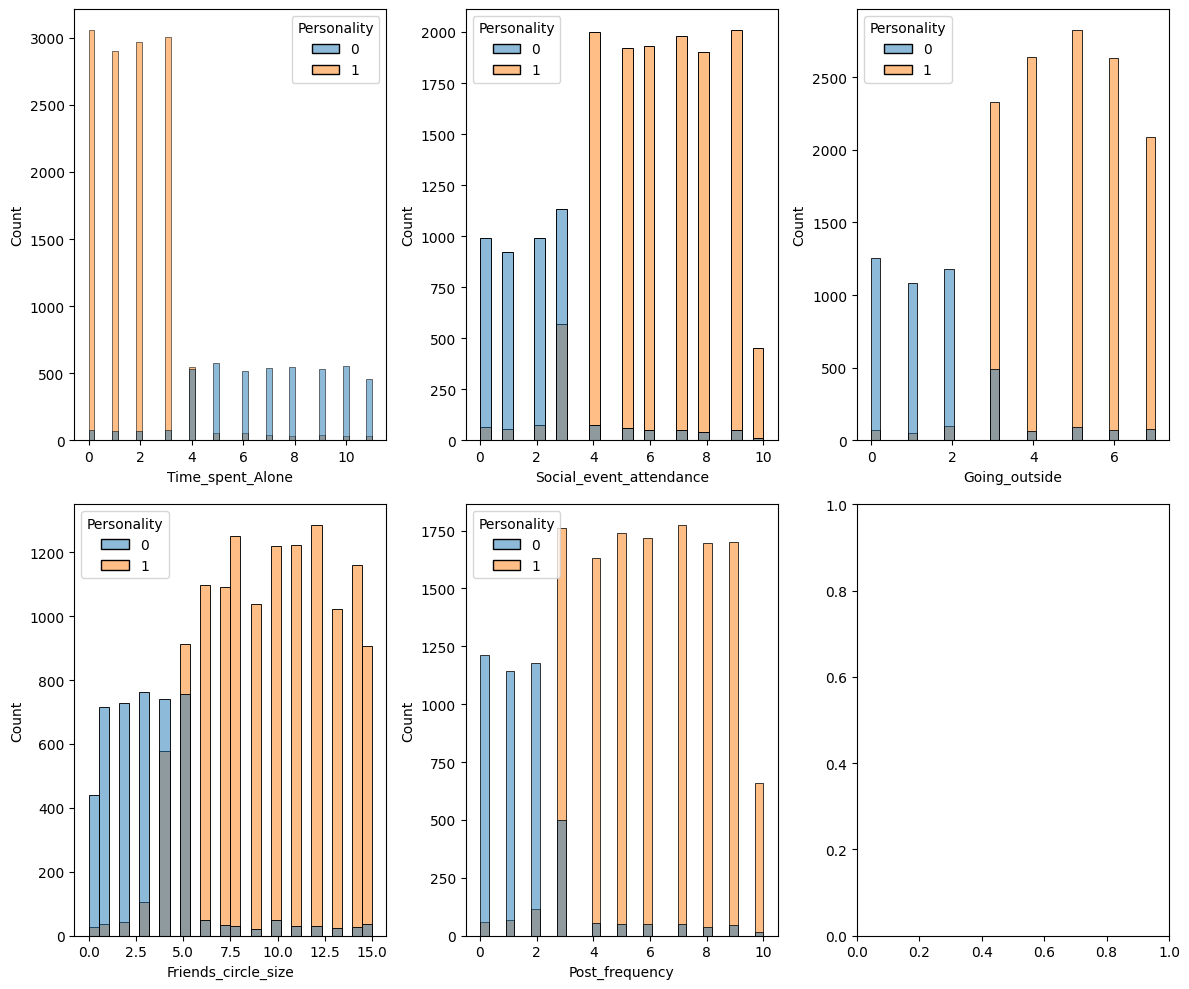

In [10]:
fig, axs = plt.subplots(2,3, figsize = (12,10))

for i, col in enumerate(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']):

    ax = axs.flat[i]
    sns.histplot(data = train, x = col, hue = 'Personality', ax = ax)

plt.tight_layout()



In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV



param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.005],
    'max_depth': [2],
    'subsample': [0.9],
    'colsample_bytree': [0.8]
}

model = XGBClassifier()

estimator = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [281]:
model = XGBClassifier(n_estimators = 80, learning_rate = 0.05, max_depth = 3, subsample = 1.0, colsample_bytree = 0.8)

In [ ]:
model.fit(x_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=80,
              n_jobs=None, num_parallel_tree=None, ...)

In [248]:
estimator.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [287]:
#best_model = estimator.best_estimator_

y_pred = model.predict(x_train)

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3873
           1       0.98      0.98      0.98     10946

    accuracy                           0.97     14819
   macro avg       0.96      0.96      0.96     14819
weighted avg       0.97      0.97      0.97     14819



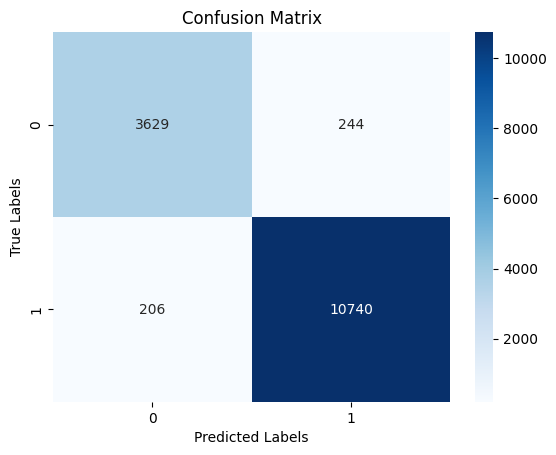

In [288]:
cm = confusion_matrix(y_train, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


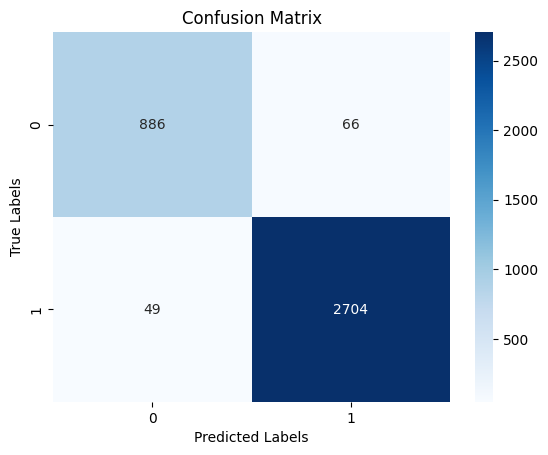

In [238]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [262]:
y_test

13209    1
2740     1
10249    1
7608     1
10528    1
        ..
3269     1
15214    0
1127     1
11368    1
17737    1
Name: Personality, Length: 3705, dtype: int64

In [292]:


# Filter x_test to show only incorrect predictions (false positives + false negatives)
incorrect_mask = y_train != y_pred
x_test_incorrect = x_train[incorrect_mask]

print(f"Total test samples: {len(x_test)}")
print(f"Incorrect predictions: {len(x_test_incorrect)}")
print(f"Accuracy: {(len(x_test) - len(x_test_incorrect)) / len(x_test):.4f}")

# Show the incorrect predictions
x_test_incorrect['Personality'] = y_train

Total test samples: 3705
Incorrect predictions: 450
Accuracy: 0.8785


C:\Users\olive\AppData\Local\Temp\ipykernel_53804\289998104.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_incorrect['Personality'] = y_train


In [298]:
narrow = x_test_incorrect[x_test_incorrect['Time_spent_Alone'] == 0]

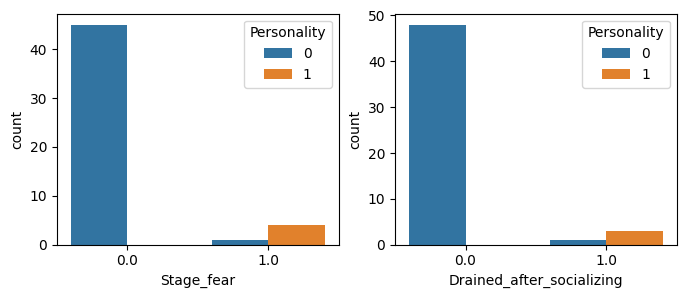

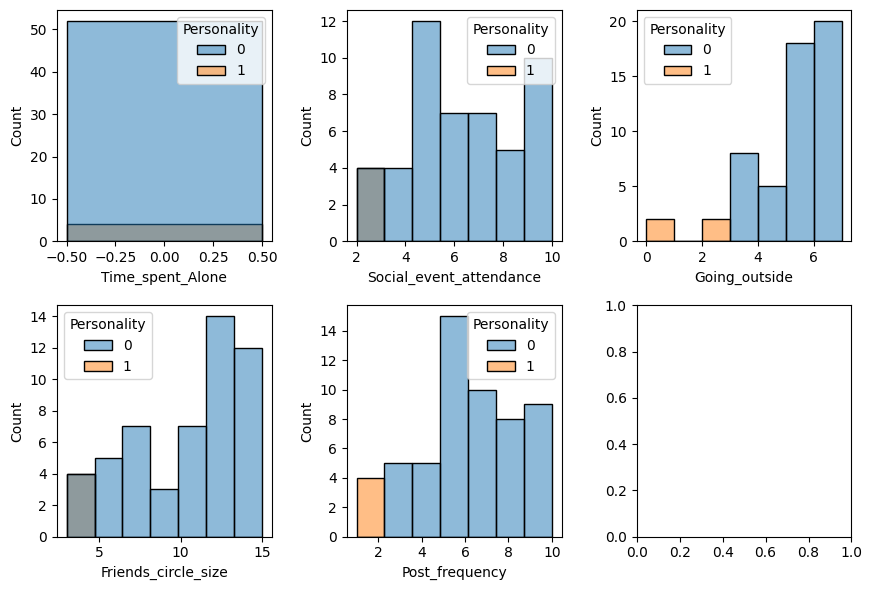

In [299]:
plot_graphs(narrow)

# More training, include original data

In [130]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakeshkapilavai/extrovert-vs-introvert-behavior-data")

print("Path to dataset files:", path)

100%|██████████| 30.5k/30.5k [00:00<00:00, 2.67MB/s]

Extracting files...
Path to dataset files: C:\Users\olive\.cache\kagglehub\datasets\rakeshkapilavai\extrovert-vs-introvert-behavior-data\versions\2


In [215]:
personality_dataset = pd.read_csv('C:/Users/olive/.cache/kagglehub/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data/versions/2/personality_dataset.csv')

personality_dataset.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [ ]:
Extracting files...
Path to dataset files: C:\Users\olive\.cache\kagglehub\datasets\rakeshkapilavai\extrovert-vs-introvert-behavior-data\versions\2

In [135]:
personality_dataset_prepped = split_features(apply_mappings(personality_dataset))

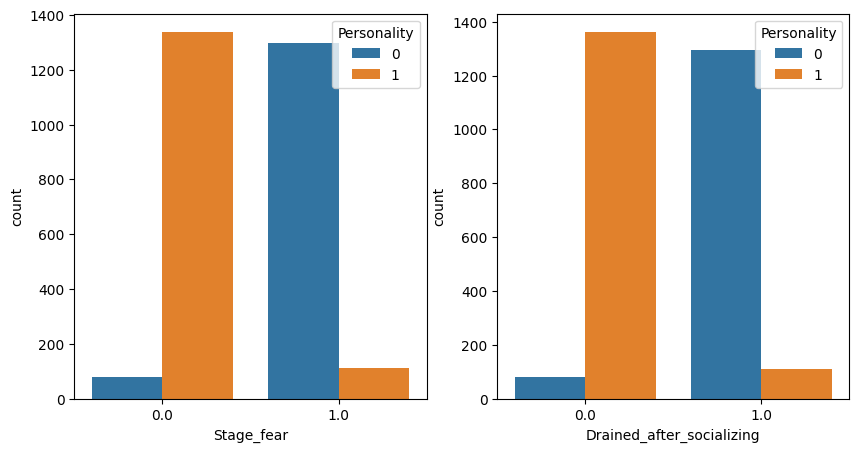

In [ ]:
fix, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(x = 'Stage_fear', data = personality_dataset_prepped, hue = 'Personality', ax = ax[0])

sns.countplot(x = 'Drained_after_socializing', data = personality_dataset_prepped, hue = 'Personality', ax = ax[1])

plt.show()

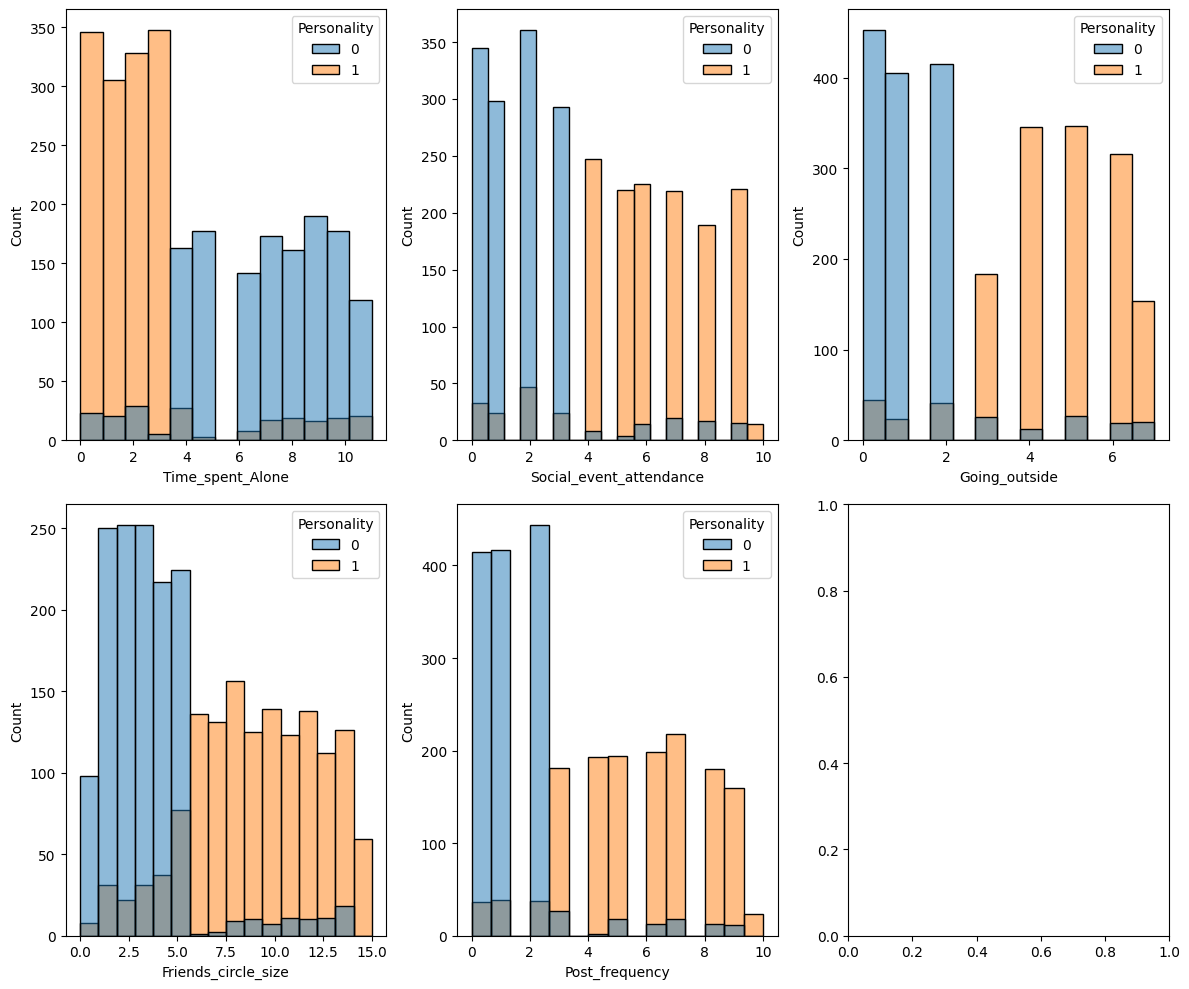

In [ ]:

fig, axs = plt.subplots(2,3, figsize = (12,10))

for i, col in enumerate(['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']):

    ax = axs.flat[i]
    sns.histplot(data = personality_dataset_prepped, x = col, hue = 'Personality', ax = ax)

plt.tight_layout()



## distributions are identical, we will add the data so we now have more training data

In [180]:

combined_df = pd.concat([train, personality_dataset_prepped], ignore_index=True)


In [201]:
X, y = train.drop(columns = ['Personality']), train['Personality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

param_grid = {
    'n_estimators': [300],
    'learning_rate': [0.005,0.01],
    'max_depth': [4, 5],
    'subsample': [0.8, 0.75],
    'colsample_bytree': [0.9]
}

model = XGBClassifier()

estimator = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy', verbose = 1, n_jobs = -1)

In [202]:
estimator.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.9],
                         'learning_rate': [0.005, 0.01], 'max_depth': [4, 5],
                         'n_estimators': [300], 'subsample': [0.8, 0.75]},
             scoring='accuracy', verbose=1)

In [184]:
estimator.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 5,
 'n_estimators': 300,
 'subsample': 0.75}

In [203]:
best_model_1 = estimator.best_estimator_

y_pred = best_model_1.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       497
           1       0.97      0.98      0.98      1356

    accuracy                           0.97      1853
   macro avg       0.97      0.96      0.96      1853
weighted avg       0.97      0.97      0.97      1853



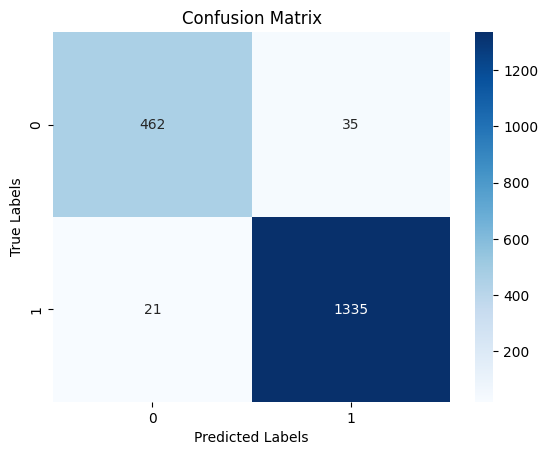

In [204]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


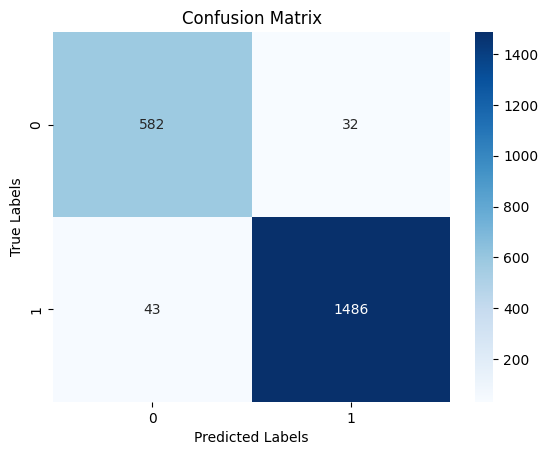

In [169]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# submission

In [37]:
test = pd.read_csv('test.csv')

In [38]:
test

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
...,...,...,...,...,...,...,...,...
6170,24694,3.0,No,5.0,5.0,No,9.0,6.0
6171,24695,8.0,Yes,2.0,1.0,Yes,0.0,0.0
6172,24696,2.0,No,4.0,3.0,No,9.0,7.0
6173,24697,3.0,No,4.0,4.0,No,11.0,9.0


In [39]:
test2 = apply_mappings(test, istest = True)
test3 = split_features(test2)

In [40]:
test3

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Time_Alone_greater3,Social_event_attendance_greater3,Going_outside_greater3,Friends_circle_size_greater5,Post_frequency_greater2
0,18524,3.0,0.0,7.0,4.0,0.0,6.0,NaN,False,True,True,True,False
1,18525,NaN,1.0,0.0,0.0,1.0,5.0,1.0,False,False,False,True,False
2,18526,3.0,0.0,5.0,6.0,0.0,15.0,9.0,False,True,True,True,True
3,18527,3.0,0.0,4.0,4.0,0.0,5.0,6.0,False,True,True,True,True
4,18528,9.0,1.0,1.0,2.0,1.0,1.0,1.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6170,24694,3.0,0.0,5.0,5.0,0.0,9.0,6.0,False,True,True,True,True
6171,24695,8.0,1.0,2.0,1.0,1.0,0.0,0.0,True,False,False,False,False
6172,24696,2.0,0.0,4.0,3.0,0.0,9.0,7.0,False,True,False,True,True
6173,24697,3.0,0.0,4.0,4.0,0.0,11.0,9.0,False,True,True,True,True


In [51]:
id_col = test3['id'].copy()
df_test = test3.drop(columns=['id'])


In [52]:
y_pred_test_new = boost_model.predict(df_test)

In [53]:
(y_pred_test == y_pred_test_new).astype(int).mean()

NameError: name 'y_pred_test' is not defined

In [54]:
submission_extra_data = pd.DataFrame({
    'id': id_col,
    'Personality': y_pred_test_new
})

submission_extra_data['Personality'] = submission_extra_data['Personality'].map({1: 'Extrovert', 0: 'Introvert'})

submission_extra_data.to_csv('submission_extra_data.csv', index=False)

submission_extra_data.head()


,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [197]:
submission_extra_data

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


---
# Ensemble Model

We have found that certain datapoints are particularly tricky for the model to predict. Perhaps these have some non linear relation with the target variable, which is counter to the main relations. To remedy this, we will train two models, the first on all the data to calculate the principle relations between features and target variable, the second will be trained on a subset of the data, on the hard to predict samples.

In [155]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torch.optim import Adam

In [111]:
train = pd.read_csv("train.csv")

In [112]:
traindf  = split_features(apply_mappings(train))
traindfcopy = traindf.copy()

In [113]:
personality = traindf['Personality']
traindf.drop(columns = ['Personality', 'id'], inplace = True)

In [114]:
xtrain, xval, ytrain, yval = train_test_split(traindf, personality, test_size = 0.2, random_state = 42)

## Firstly train xgboost model on train data

In [115]:
boost_model = xgb.XGBClassifier(n_estimators = 300, learning_rate = 0.005, max_depth = 4, subsample = 0.8, colsample_bytree = 0.9)

boost_model.fit(xtrain, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.005, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [116]:
ypred_boost = boost_model.predict(xval)

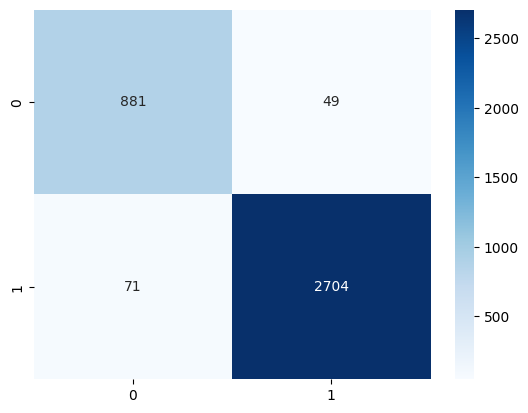

In [117]:
cm = confusion_matrix(ypred_boost, y_test)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.show()

In [118]:
accuracy_score(yval, ypred_boost)

0.9676113360323887

Basically the same performance as before.  

Now use xgboost model to filter out hard to predict samples.

In [119]:
all_preds = boost_model.predict(traindf)

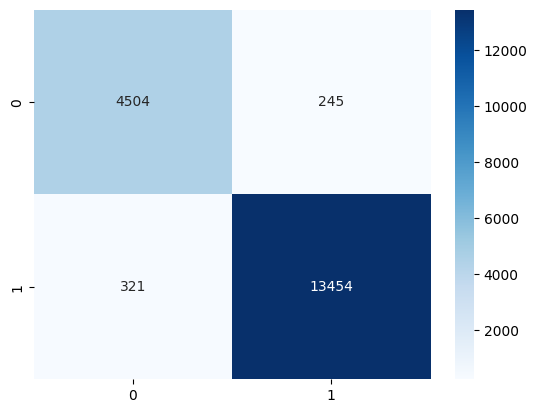

In [120]:
cm = confusion_matrix(all_preds, personality)

sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.show()

In [121]:
accuracy_score(all_preds, personality) ## slightly better performance with training data -> slight overfit, potential to improve perhaps

0.969445044266897

In [133]:
tricky_samples = traindf[all_preds != personality]

tricky_targets = personality[all_preds != personality]

tricky_samples['Personality'] = tricky_targets

tricky_samples.shape


C:\Users\olive\AppData\Local\Temp\ipykernel_52480\1569818596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tricky_samples['Personality'] = tricky_targets


(566, 13)

In [149]:
extra_samples = traindfcopy.sample(tricky_samples.shape[0]).drop(columns = 'id')

tricky_subset = pd.concat([tricky_samples, extra_samples])

tricky_subset.shape

(1132, 13)

In [150]:
tricky_subset.isna().sum()

Time_spent_Alone                     78
Stage_fear                          106
Social_event_attendance              62
Going_outside                        81
Drained_after_socializing            68
Friends_circle_size                  61
Post_frequency                       67
Time_Alone_greater3                   0
Social_event_attendance_greater3      0
Going_outside_greater3                0
Friends_circle_size_greater5          0
Post_frequency_greater2               0
Personality                           0
dtype: int64

In [151]:
tricky_subset.dtypes

Time_spent_Alone                    float64
Stage_fear                          float64
Social_event_attendance             float64
Going_outside                       float64
Drained_after_socializing           float64
Friends_circle_size                 float64
Post_frequency                      float64
Time_Alone_greater3                    bool
Social_event_attendance_greater3       bool
Going_outside_greater3                 bool
Friends_circle_size_greater5           bool
Post_frequency_greater2                bool
Personality                           int64
dtype: object

In [190]:
# Step 1: Separate column types
float_cols = tricky_subset.select_dtypes(include='float').columns.tolist()
bool_cols = tricky_subset.select_dtypes(include='bool').columns.tolist()

# Step 2: Define transformers
float_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

bool_pipeline = Pipeline([
    ("bool_to_int", FunctionTransformer(lambda x: x.astype(int))),
    ("scaler", StandardScaler())
])

# Step 3: Combine pipelines
preprocessor = ColumnTransformer([
    ("float_processing", float_pipeline, float_cols),
    ("bool_processing", bool_pipeline, bool_cols)
])

# Step 4: Fit and transform (excluding target)
y = tricky_subset['Personality']
X = tricky_subset.drop(columns=["Personality"])
X_processed = preprocessor.fit_transform(X)

y_all = traindfcopy['Personality']
X_all = traindf
X_all_processed = pd.DataFrame(preprocessor.fit_transform(X_all))


# Optional: Get processed feature names
processed_features = float_cols + bool_cols
X_processed_df = pd.DataFrame(X_processed, columns=processed_features, index=X.index)


In [191]:
xtrain_nn, xval_nn, ytrain_nn, yval_nn = train_test_split(X_processed_df, y, test_size = 0.15, random_state = 42)

In [192]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cpu


In [193]:
class dataset(Dataset):

    def __init__(self, X, y = None):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32) if y is not None else None

    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        if self.y is not None:
            return self.X[idx], self.y[idx]
        else:
            return self.X[idx]

In [197]:
training_data = dataset(xtrain_nn, ytrain_nn)
validation_data = dataset(xval_nn, yval_nn)
all_data = dataset(X_all_processed, y_all)

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True)
validation_dataloader = DataLoader(validation_data, batch_size=32, shuffle=True)
all_dataloader = DataLoader(all_data, batch_size=32, shuffle=True)

In [198]:
xtrain_nn.shape

(962, 12)

In [240]:
class MyModel(nn.Module):

    def __init__(self, input_dim):
        super(MyModel, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
            )

    def forward(self, x):
        return self.net(x)

In [241]:
input_dim = xtrain_nn.shape[1]  # Number of features
model = MyModel(input_dim).to(device)

In [242]:
summary(model)

Layer (type:depth-idx)                   Param #
MyModel                                  --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       1,664
│    └─LeakyReLU: 2-2                    --
│    └─Dropout: 2-3                      --
│    └─Linear: 2-4                       8,256
│    └─LeakyReLU: 2-5                    --
│    └─Dropout: 2-6                      --
│    └─Linear: 2-7                       2,080
│    └─LeakyReLU: 2-8                    --
│    └─Linear: 2-9                       33
│    └─Sigmoid: 2-10                     --
Total params: 12,033
Trainable params: 12,033
Non-trainable params: 0

In [243]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.005)

In [244]:
total_loss_train_plot = []
total_acc_train_plot = []

epochs = 110
for epoch in range(epochs):
    total_loss_train = 0
    total_acc_train = 0

    for x, y in train_dataloader:
        x = x.to(device)
        y = y.to(device)

        y_pred = model(x).squeeze(1)

        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        total_loss_train += loss.item()

        # Compute batch accuracy
        preds = (y_pred > 0.5).float()
        correct = (preds == y).sum().item()
        acc = correct / len(y)
        total_acc_train += acc

    # Store epoch metrics
    total_loss_train_plot.append(total_loss_train / len(train_dataloader))
    total_acc_train_plot.append(total_acc_train / len(train_dataloader))

    if epoch % 5 == 0:
        print(f"Epoch {epoch+1}: loss = {total_loss_train_plot[-1]:.4f}, acc = {total_acc_train_plot[-1]:.4f}")


Epoch 1: loss = 0.6767, acc = 0.5917
Epoch 6: loss = 0.6352, acc = 0.6452
Epoch 11: loss = 0.6248, acc = 0.6321
Epoch 16: loss = 0.6183, acc = 0.6532
Epoch 21: loss = 0.6175, acc = 0.6502
Epoch 26: loss = 0.6296, acc = 0.6401
Epoch 31: loss = 0.6020, acc = 0.6683
Epoch 36: loss = 0.5721, acc = 0.6825
Epoch 41: loss = 0.5833, acc = 0.6764
Epoch 46: loss = 0.5503, acc = 0.6986
Epoch 51: loss = 0.5646, acc = 0.6794
Epoch 56: loss = 0.5514, acc = 0.6956
Epoch 61: loss = 0.5753, acc = 0.6663
Epoch 66: loss = 0.5541, acc = 0.6764
Epoch 71: loss = 0.5174, acc = 0.7157
Epoch 76: loss = 0.5309, acc = 0.7056
Epoch 81: loss = 0.4911, acc = 0.7329
Epoch 86: loss = 0.4993, acc = 0.7450
Epoch 91: loss = 0.5036, acc = 0.7137
Epoch 96: loss = 0.5036, acc = 0.7288
Epoch 101: loss = 0.4661, acc = 0.7631
Epoch 106: loss = 0.4466, acc = 0.7681


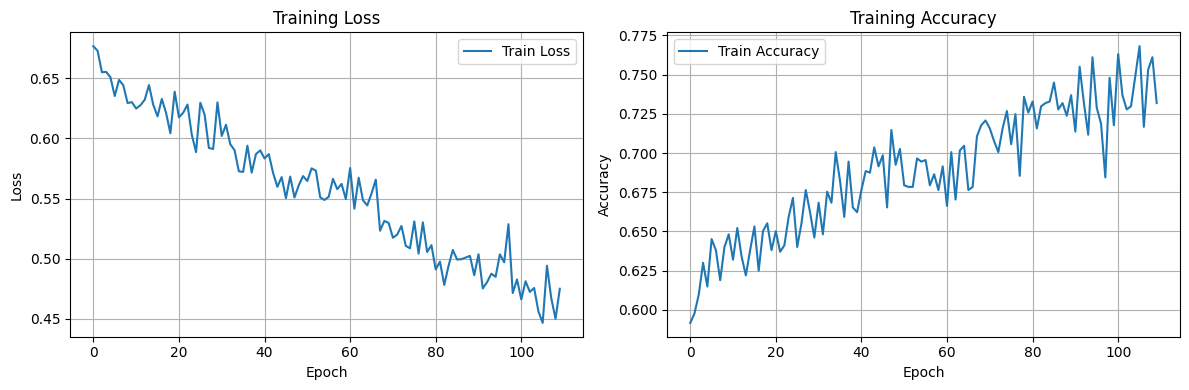

In [245]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(total_loss_train_plot, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(total_acc_train_plot, label="Train Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


In [246]:
with torch.no_grad():

    all_preds = []
    all_targets = []

    for x, y in validation_dataloader:

        x.to(device)
        y.to(device)

        y_pred = model(x).squeeze(1)

        all_preds.append(y_pred)
        all_targets.append(y.cpu())

In [247]:
# Concatenate all batches into one tensor
all_preds = torch.cat(all_preds)
all_targets = torch.cat(all_targets)

class_preds = (all_preds > 0.5).int()

In [248]:
y_trues = all_targets.numpy()
y_preds = class_preds.numpy()

0.6058823529411764


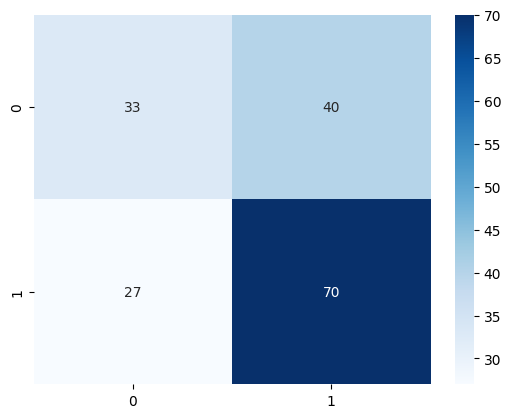

In [249]:
cm = confusion_matrix(y_trues, y_preds)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

print(accuracy_score(y_trues, y_preds))

In [256]:
xval_boost, yval_boost = xval, yval

xval_nn = pd.DataFrame(preprocessor.fit_transform(xval_boost))

xval_nn.shape


(3705, 12)

In [257]:
stack_data = dataset(xval_nn, yval)

stack_dataloader = DataLoader(stack_data, batch_size=32, shuffle=True)


In [280]:
## Boost predictions

xgb_preds = boost_model.predict_proba(xval_boost)[:, 1]

In [284]:
## PyTorch Predictions

with torch.no_grad():

    pt_preds = []
    all_targets = []

    for x, y in stack_dataloader:

        x.to(device)
        y.to(device)

        y_pred = model(x).squeeze(1)

        pt_preds.append(y_pred)
        all_targets.append(y.cpu())


# Concatenate all batches into one tensor
pt_preds = torch.cat(pt_preds)
all_targets = torch.cat(all_targets)

class_preds = (pt_preds > 0.5).int()

y_trues = all_targets.numpy()
pt_preds_np = pt_preds.numpy()

In [290]:
import numpy as np

stacked_preds = np.column_stack([xgb_preds, pt_preds_np])  # shape (N, 2)


In [291]:
stacked_preds.shape

(3705, 2)

In [292]:
from sklearn.linear_model import LogisticRegression

meta_model = LogisticRegression()
meta_model.fit(stacked_preds, yval_boost)


LogisticRegression()

## Test

In [318]:
test_imp = pd.read_csv('test.csv')

test2 = apply_mappings(test_imp, istest = True)
test3 = split_features(test2)

id_col = test3['id']
test3.drop(columns = ['id'], inplace = True)

In [319]:
boost_xtest = test3

pt_xtest = pd.DataFrame(preprocessor.fit_transform(boost_xtest))

pt_xtest_data = dataset(pt_xtest, y = None)

pt_xtest_dataloader = DataLoader(pt_xtest_data, batch_size=32, shuffle=False)

In [320]:
# Boost predictions

xg_boostproba = boost_model.predict_proba(boost_xtest)[:, 1]

In [321]:
## PyTorch Predictions

with torch.no_grad():

    pt_preds = []
    all_targets = []

    for x in pt_xtest_dataloader:

        x.to(device)
        #y.to(device)

        y_pred = model(x).squeeze(1)

        pt_preds.append(y_pred)
        #all_targets.append(y.cpu())


# Concatenate all batches into one tensor
pt_preds = torch.cat(pt_preds)
#all_targets = torch.cat(all_targets)

class_preds = (pt_preds > 0.5).int()

#y_trues = all_targets.numpy()
pt_preds_np_test = pt_preds.numpy()

In [322]:

stacked_preds_test = np.column_stack([xg_boostproba, pt_preds_np_test])  # shape (N, 2)


In [323]:
xg_boostproba.shape

(6175,)

In [324]:
pt_preds_np_test.shape

(6175,)

In [328]:
meta_test_predicts = meta_model.predict(stacked_preds_test)

In [327]:
id_col

0       18524
1       18525
2       18526
3       18527
4       18528
        ...  
6170    24694
6171    24695
6172    24696
6173    24697
6174    24698
Name: id, Length: 6175, dtype: int64

In [329]:
meta_model_df = pd.DataFrame({'id': id_col, 'Personality': meta_test_predicts})

In [330]:
meta_model_df

,id,Personality
0,18524,1
1,18525,0
2,18526,1
3,18527,1
4,18528,0
...,...,...
6170,24694,1
6171,24695,0
6172,24696,1
6173,24697,1


In [333]:
meta_model_df

,id,Personality
0,18524,1
1,18525,0
2,18526,1
3,18527,1
4,18528,0
...,...,...
6170,24694,1
6171,24695,0
6172,24696,1
6173,24697,1


In [337]:
meta_model_df['Personality'] = meta_model_df['Personality'].map({1: 'Extrovert', 0: 'Introvert'})

In [338]:
meta_model_df

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert
...,...,...
6170,24694,Extrovert
6171,24695,Introvert
6172,24696,Extrovert
6173,24697,Extrovert


In [339]:
meta_model_df.to_csv('submissions/meta_model_df.csv', index=False)